### **<span style="color:#1a73e8;">Gráficos para el análisis de una sola variable</span>**

In [15]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
df_csv = pd.read_csv('Set_datos_T1_completo.csv')
df_csv

,formacion_academica,estrato_socioeconomico,sexo,edad,desempeno_neurocognitivo,duracion_sueno,consumo_cafe,fc_antes,fc_despues,fr_antes,fr_despues,pas_antes,pad_antes,pas_despues,pad_despues
0,2.5,1.2,Mujer,36,2.8,1,2,87.483571,79.684860,14.649643,14.557451,109.429593,78.925925,104.495644,75.160523
1,4.5,3.0,Mujer,28,2.1,4,3,84.308678,77.459411,15.710963,14.571348,111.845346,66.111595,107.852646,62.038182
2,3.9,3.1,Mujer,54,2.8,4,2,88.238443,83.119182,14.415160,12.828766,110.289699,78.573728,105.634449,75.075038
3,3.1,3.0,Hombre,42,4.0,4,4,92.615149,88.909023,15.384077,11.496389,112.260021,73.831380,105.830557,72.773877
4,4.2,3.0,Hombre,29,3.6,2,4,83.829233,77.432786,12.212771,9.656218,113.929248,78.537289,106.373535,75.692711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.0,4.2,Hombre,59,3.0,4,4,83.594499,76.454198,16.154961,14.126503,113.510666,86.049278,108.307406,81.748176
996,2.4,1.5,Hombre,21,1.6,3,2,93.988433,89.041475,16.515505,16.593317,118.845158,76.634973,111.510723,75.633318
997,4.4,5.0,Hombre,23,4.0,3,4,88.204214,84.967964,13.516479,11.836777,112.363055,70.824377,104.186160,68.529694
998,3.8,3.5,Mujer,32,1.8,4,1,82.144105,77.470239,16.668353,13.024975,114.974467,83.264565,111.344441,79.768800


### **<span style="color:#1a73e8;">Variables Cualitativas</span>**

**1. Gráfico de Barras** 📊:

Compara frecuencias de categorías.

✅ Para qué se usa: Comparar tamaños entre categorías.


**2. Gráfico de Torta** 🥧:

Muestra proporciones (%) de un total.

✅ Para qué se usa: Visualizar participación porcentual.


In [3]:
def graficar_distribucion_categorica(df, columna):
    """
    Grafica un gráfico de torta y un gráfico de barras para una variable categórica.

    Parámetros:
    - df: DataFrame con los datos
    - columna: Nombre de la columna categórica a graficar
    """

    print(f"\n\033[1m{columna.upper()}\033[0m")
    
    # Conteo de frecuencias
    conteo = df[columna].value_counts().sort_values(ascending=False)

    # Paleta de colores (morado pastel)
    colores = ["#D4A5F0", "#C3A2FF", "#B5A8F2", "#A89DE6", "#9D92D9", "#9287CC", "#877CC0"]

    # --- Gráfico de torta ---
    fig_torta = go.Figure(go.Pie(
        labels=conteo.index,
        values=conteo.values,
        marker=dict(colors=colores[:len(conteo)]),
        hole=0.3,
        textinfo="label+percent"
    ))
    fig_torta.update_layout( title="Distribución porcentual de la variable",template="plotly_white", width=700, height=600)
    fig_torta.show()

    # --- Gráfico de barras ---
    fig_barras = go.Figure(go.Bar(
        x=conteo.index,
        y=conteo.values,
        text=conteo.values,
        textposition="outside",
        marker=dict(color=colores[:len(conteo)])
    ))
    fig_barras.update_layout(title="Frecuencia absoluta de la variable", template="plotly_white", width=700, height=600, showlegend=False)
    fig_barras.show()

In [10]:
graficar_distribucion_categorica(df_csv, 'sexo')

graficar_distribucion_categorica(df_csv, 'consumo_cafe')


SEXO



CONSUMO_CAFE


### **<span style="color:#1a73e8;">Variables Cuantitativas</span>**

**1. Histograma** 📈:

Muestra la distribución de frecuencias agrupadas en intervalos (bins).

✅ Para qué se usa: Ver forma de la distribución (asimetría, concentración, dispersión).

Interpretación: Altura de cada barra indica cuántos valores caen en ese rango.

📏 Número de bins (intervalos)
Para elegirlos, se puede usar:

📐 Regla de Freedman–Diaconis:

$$
\text{Bin Width} = 2 \cdot \frac{IQR}{\sqrt[3]{n}}
$$

$$
\text{Número de bins} = \frac{\text{máximo} - \text{mínimo}}{\text{Ancho del bin}}
$$


In [16]:
def graficar_histograma(df, columna, color="#A7C7E7"):
    """
    Grafica un histograma simple para una variable numérica.

    Parámetros:
    - df: DataFrame con los datos.
    - columna: Nombre de la columna numérica a graficar.
    - color: Color del histograma (por defecto azul claro).
    """
    # Calcular número de bins usando regla de Freedman-Diaconis
    datos = df[columna].dropna()
    q75, q25 = np.percentile(datos, [75 ,25])
    iqr = q75 - q25
    bin_width = 2 * iqr / np.cbrt(len(datos))
    num_bins = int((datos.max() - datos.min()) / bin_width) if bin_width > 0 else 20

    print(f"Variable: {columna}")
    print(f"Rango intercuartílico (IQR): {iqr:.2f}")
    print(f"Número de bins calculado: {num_bins}")

    # Obtener histograma como datos
    frecuencias, bordes = np.histogram(datos, bins=num_bins)

    # Imprimir intervalos y frecuencias
    print(f"\n📊 Histograma de: {columna}")
    print(f"IQR = {iqr:.2f} | Ancho de bin = {bin_width:.2f} | Bins = {num_bins}\n")
    print("Intervalo\t\tFrecuencia")
    for i in range(len(frecuencias)):
        print(f"[{bordes[i]:.2f}, {bordes[i+1]:.2f})\t\t{frecuencias[i]}")

    # Graficar histograma
    plt.figure(figsize=(10, 5))
    sns.histplot(datos, bins=num_bins, color=color, kde=True)
    plt.title(f"Histograma de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Variable: edad
Rango intercuartílico (IQR): 14.00
Número de bins calculado: 15

📊 Histograma de: edad
IQR = 14.00 | Ancho de bin = 2.80 | Bins = 15

Intervalo		Frecuencia
[18.00, 20.93)		25
[20.93, 23.87)		29
[23.87, 26.80)		25
[26.80, 29.73)		57
[29.73, 32.67)		77
[32.67, 35.60)		83
[35.60, 38.53)		118
[38.53, 41.47)		108
[41.47, 44.40)		117
[44.40, 47.33)		103
[47.33, 50.27)		87
[50.27, 53.20)		70
[53.20, 56.13)		47
[56.13, 59.07)		27
[59.07, 62.00)		27


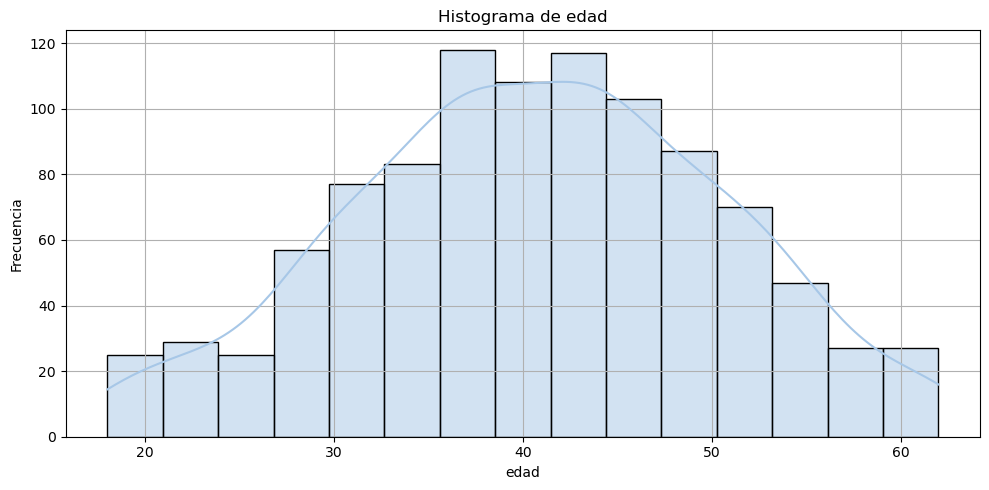

In [17]:
graficar_histograma(df_csv, 'edad')

**2 Gráfico de densidad**:

Muestra una estimación suavizada de la distribución de los datos.

✅ Para qué se usa: Ver la forma general de los datos (asimetría, picos, dispersión) sin depender de cortes en intervalos como en el histograma.

Interpretación: 

El área total bajo la curva es igual a 1.
Los picos muestran concentraciones de datos.


In [18]:
def graficar_densidad(df, columna, color="#A7C7E7"):
    """
    Grafica la distribución de densidad (KDE) para una variable numérica.

    Parámetros:
    - df: DataFrame con los datos.
    - columna: Nombre de la columna numérica a graficar.
    - color: Color de la curva de densidad.
    """
    datos = df[columna].dropna()

    print(f"\n📈 Curva de densidad para: {columna}")
    print("Esta gráfica muestra cómo se distribuyen los valores de la variable.")

    # Graficar KDE
    plt.figure(figsize=(10, 5))
    sns.kdeplot(datos, color=color, fill=True, linewidth=2, alpha=0.5)

    # Etiquetas
    plt.title(f"Densidad de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Densidad estimada")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


📈 Curva de densidad para: edad
Esta gráfica muestra cómo se distribuyen los valores de la variable.


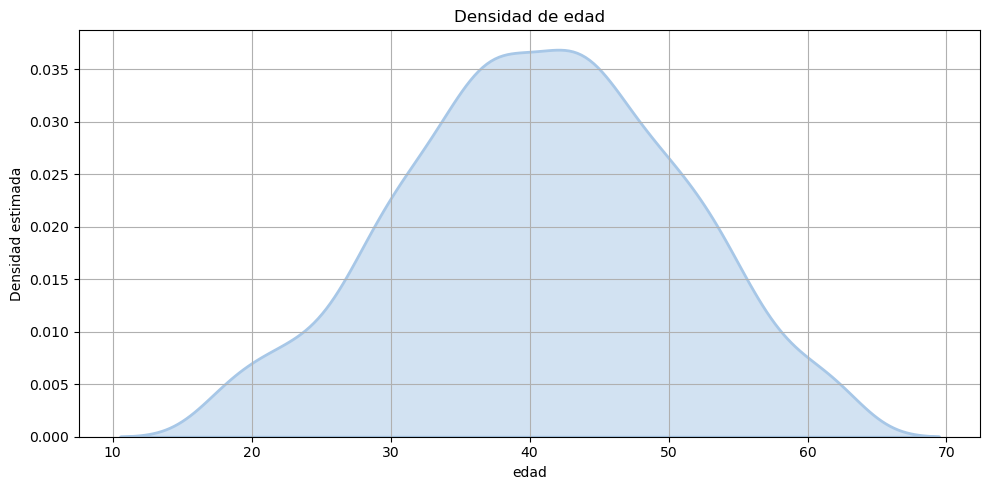

In [19]:
graficar_densidad(df_csv, 'edad')

**3. Boxplot (Diagrama de caja)**:

Muestra la mediana, cuartiles y posibles outliers..

✅ Para qué se usa: Visualizar la dispersión y simetría de los datos.

*Interpretación*: 

- Caja: del Q1 al Q3.

Representa el 50% de los datos desde Q1 hasta Q3, y tiene una línea que señala la mediana. 
La caja muestra la dispersión de la distribución en función de la separación existente entre Q1 y Q3, así como también si la distribución es simétrica en torno a la mediana o si esta sesgada hacia alguno de los lados. 

- Bigotes:

Se extienden desde ambos lados de los extremos de la caja y representan los rangos del 25% de valores de la parte inferior (Q1 – 1,5 IQR) y el 25% de valores de la parte superior (Q3 + 1,5 IQR), excluyendo los valores atípicos.


- Valores atípicos (Ouliers):

Esta representación identifica como valores atípicos aquellas observaciones que presentan valores inferiores o superiores a los límites del gráfico (límite inferior: Q1 – 1,5 IQR y límite superior: Q3 + 1,5 IQR).





In [20]:
def graficar_boxplot(df, columna, color="#A7C7E7"):
    """
    Grafica un boxplot (diagrama de caja) usando Plotly para una variable numérica.

    Parámetros:
    - df: DataFrame con los datos
    - columna: Nombre de la columna numérica
    - color: Color de la caja
    """
    print(f"\n📦 Boxplot de: {columna}")
    print("Este gráfico muestra la mediana, los cuartiles y posibles valores atípicos.")

    fig = go.Figure()
    fig.add_trace(go.Box(
        y=df[columna],
        name=columna,
        boxpoints='outliers',  # Muestra puntos atípicos
        marker_color=color,
        line=dict(color="black"),
        fillcolor=color,
        opacity=0.7
    ))

    fig.update_layout(
        title=f"Boxplot de {columna}",
        yaxis_title=columna,
        template="plotly_white",
        width=700,
        height=500
    )

    fig.show()

In [21]:
graficar_boxplot(df_csv, 'edad')


📦 Boxplot de: edad
Este gráfico muestra la mediana, los cuartiles y posibles valores atípicos.


**Graficar boxplot e histograma**

Esta función genera dos gráficos muy útiles para analizar una variable numérica:

1. Boxplot (Diagrama de Caja): resume la distribución de los datos mostrando:

    - Mediana (línea central)

    - Cuartiles (caja)

    - Valores atípicos u "outliers" (puntos fuera de los extremos)

2. Histograma: muestra la frecuencia de los valores agrupados en intervalos (también llamados bins). Es útil para visualizar la forma de la distribución (simétrica, sesgada, etc.).



In [22]:
def graficar_boxplot_e_histograma(df, columna, color="#A7C7E7"):
    """
    Grafica un boxplot y un histograma para una variable numérica.
    También muestra la frecuencia de cada intervalo del histograma.

    Parámetros:
    - df: DataFrame con los datos
    - columna: Nombre de la columna numérica a graficar
    - color: Color de los gráficos
    """

    print(f"\n📊 Análisis de la variable: {columna}")

    # Calcular número de bins usando la regla de Freedman-Diaconis
    datos = df[columna].dropna()
    q1 = np.percentile(datos, 25)
    q3 = np.percentile(datos, 75)
    iqr = q3 - q1
    bin_width = 2 * iqr / (len(datos) ** (1/3))
    num_bins = int(np.ceil((datos.max() - datos.min()) / bin_width)) if bin_width > 0 else 10

    print(f"👉 Número de intervalos (bins): {num_bins}")

    # Calcular frecuencias e intervalos
    frecuencias, bordes = np.histogram(datos, bins=num_bins)

    print("\n📌 Frecuencia en cada intervalo:")
    for i in range(len(frecuencias)):
        izquierda = round(bordes[i], 2)
        derecha = round(bordes[i+1], 2)
        print(f"Intervalo {i+1}: [{izquierda}, {derecha}) → {frecuencias[i]} datos")

    # Crear los gráficos
    fig, ejes = plt.subplots(nrows=2, sharex=True, figsize=(12, 6),
                             gridspec_kw={"height_ratios": [0.3, 1]})

    # Boxplot
    sns.boxplot(x=datos, ax=ejes[0], color=color, width=0.5,
                flierprops={'marker': 'o', 'color': 'black'})
    ejes[0].set_title("Boxplot (diagrama de caja)")
    ejes[0].set(yticks=[])

    # Histograma
    sns.histplot(datos, bins=num_bins, color=color, alpha=0.7, ax=ejes[1], kde=False)
    ejes[1].set_title("Histograma (frecuencia de los valores)")
    ejes[1].set_xlabel(columna)
    ejes[1].set_ylabel("Frecuencia")

    sns.despine(left=True)
    plt.tight_layout()
    plt.show()


📊 Análisis de la variable: edad
👉 Número de intervalos (bins): 16

📌 Frecuencia en cada intervalo:
Intervalo 1: [18.0, 20.75) → 25 datos
Intervalo 2: [20.75, 23.5) → 29 datos
Intervalo 3: [23.5, 26.25) → 25 datos
Intervalo 4: [26.25, 29.0) → 34 datos
Intervalo 5: [29.0, 31.75) → 72 datos
Intervalo 6: [31.75, 34.5) → 84 datos
Intervalo 7: [34.5, 37.25) → 111 datos
Intervalo 8: [37.25, 40.0) → 76 datos
Intervalo 9: [40.0, 42.75) → 101 datos
Intervalo 10: [42.75, 45.5) → 117 datos
Intervalo 11: [45.5, 48.25) → 89 datos
Intervalo 12: [48.25, 51.0) → 66 datos
Intervalo 13: [51.0, 53.75) → 70 datos
Intervalo 14: [53.75, 56.5) → 47 datos
Intervalo 15: [56.5, 59.25) → 27 datos
Intervalo 16: [59.25, 62.0) → 27 datos


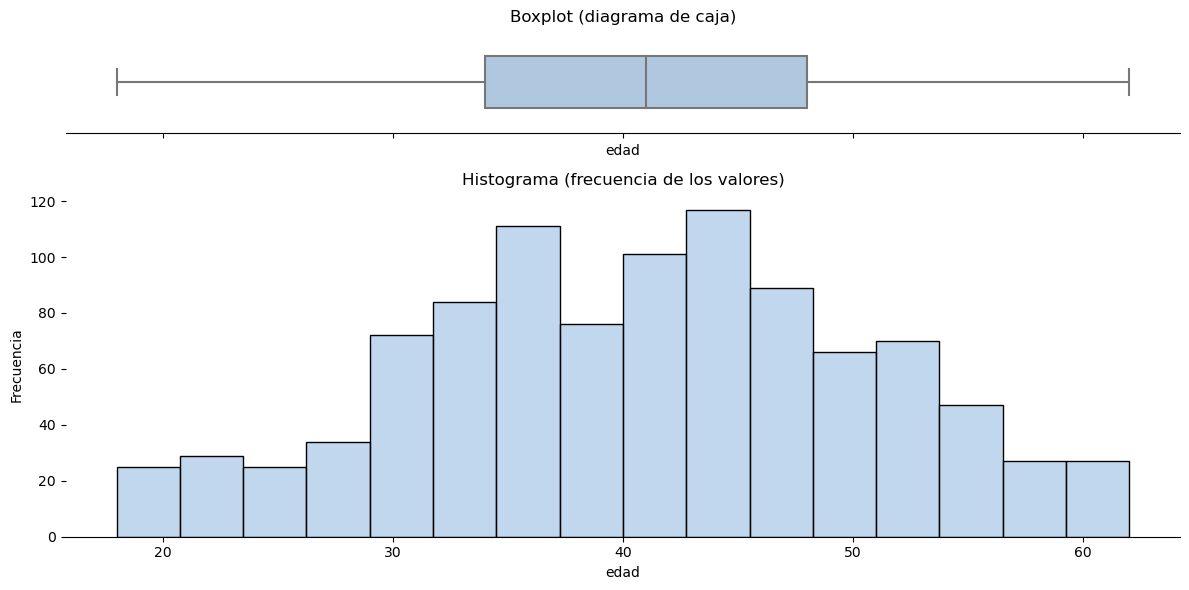


📊 Análisis de la variable: fc_antes
👉 Número de intervalos (bins): 28

📌 Frecuencia en cada intervalo:
Intervalo 1: [68.79, 70.06) → 1 datos
Intervalo 2: [70.06, 71.33) → 0 datos
Intervalo 3: [71.33, 72.59) → 3 datos
Intervalo 4: [72.59, 73.86) → 3 datos
Intervalo 5: [73.86, 75.13) → 11 datos
Intervalo 6: [75.13, 76.39) → 13 datos
Intervalo 7: [76.39, 77.66) → 29 datos
Intervalo 8: [77.66, 78.93) → 46 datos
Intervalo 9: [78.93, 80.19) → 53 datos
Intervalo 10: [80.19, 81.46) → 70 datos
Intervalo 11: [81.46, 82.73) → 103 datos
Intervalo 12: [82.73, 84.0) → 87 datos
Intervalo 13: [84.0, 85.26) → 93 datos
Intervalo 14: [85.26, 86.53) → 110 datos
Intervalo 15: [86.53, 87.8) → 89 datos
Intervalo 16: [87.8, 89.06) → 86 datos
Intervalo 17: [89.06, 90.33) → 64 datos
Intervalo 18: [90.33, 91.6) → 40 datos
Intervalo 19: [91.6, 92.86) → 38 datos
Intervalo 20: [92.86, 94.13) → 23 datos
Intervalo 21: [94.13, 95.4) → 17 datos
Intervalo 22: [95.4, 96.66) → 11 datos
Intervalo 23: [96.66, 97.93) → 6 da

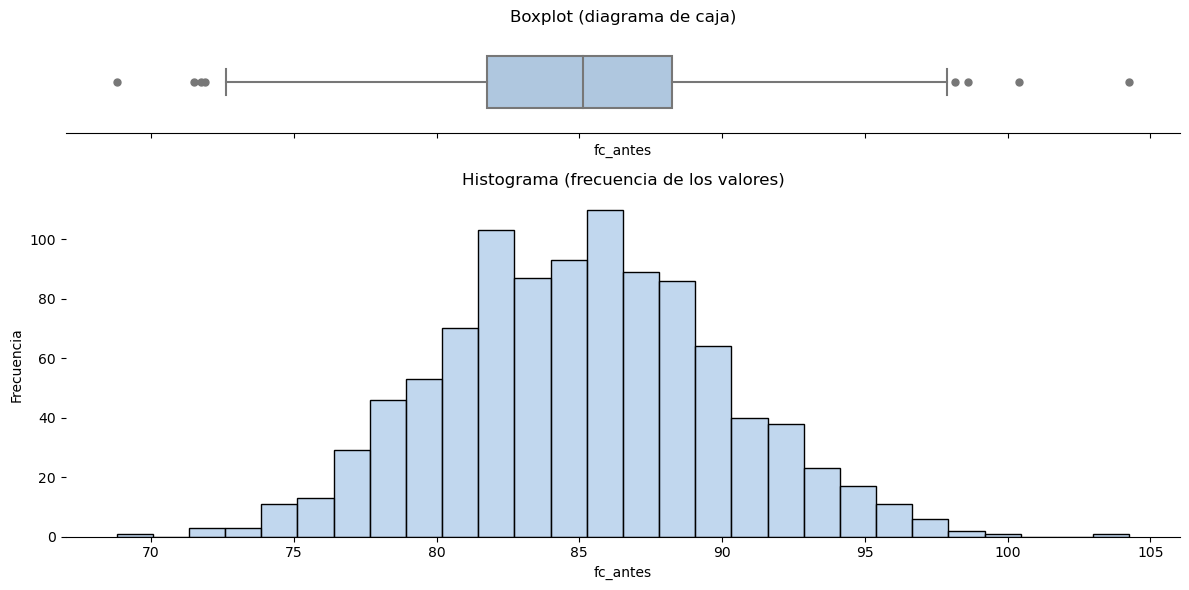

In [23]:
graficar_boxplot_e_histograma(df_csv, 'edad')

graficar_boxplot_e_histograma(df_csv, 'fc_antes')

**4. Gráfico de violín (Violin plot)**:

Muestra la distribución de datos + estadísticos del boxplot.

✅ Para qué se usa: Ver la forma de la distribución y densidad en diferentes rangos.

Interpretación: 

Ancho del violín = densidad de datos. También muestra la mediana.


In [24]:
def graficar_violin(df, columna, color="#A7C7E7"):
    """
    Genera un diagrama de violín con boxplot para una variable numérica usando Plotly.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - columna: Nombre de la columna numérica a graficar.
    - color: Color del gráfico (por defecto azul claro).
    """
    print(f"\n\033[1m{columna.upper()}\033[0m")  # Título en consola en negrita

    fig = go.Figure()

    fig.add_trace(go.Violin(
        y=df[columna],
        box_visible=True,             # Muestra el boxplot
        meanline_visible=True,        # Muestra línea de la media
        line_color='black',
        fillcolor=color,
        opacity=0.7,
        name=columna
    ))

    fig.update_layout(
        title=dict(text=f"Diagrama de violín de {columna}", font=dict(color="black")),
        yaxis_title="Valor",
        template="plotly_white",
        width=800,
        height=500
    )

    fig.show()

In [25]:
graficar_violin(df_csv, 'edad')

graficar_violin(df_csv, 'fc_antes')


EDAD



FC_ANTES


**5. Gráfico de puntos (Strip plot / Dot plot)**:

Muestra cada observación como un punto individual.

✅ Para qué se usa: Observar la frecuencia y dispersión. se recomienda especialmente para muestras pequeñas, ya que permite observar el valor individual de cada observación. Sin embargo, con ajustes visuales (como transparencia o jitter), también puede ser útil con muestras grandes, ayudando a visualizar la concentración y dispersión de los datos.

Interpretación: 

Se ven acumulaciones o repeticiones fácilmente.



In [26]:
def grafico_puntos(df, col, opacity=0.7, size=6, color_palette="#4C78A8"):
    """
    Genera un gráfico de dispersión para una sola variable numérica.

    Parámetros:
    - df: DataFrame con los datos.
    - col: Nombre de la columna numérica.
    - opacity: Transparencia de los puntos (entre 0 y 1).
    - size: Tamaño de los puntos.
    - title: Título del gráfico (opcional).
    - color_palette: Color de los puntos.
    """
    fig = px.scatter(
        df,
        x=df.index,
        y=col,
        opacity=opacity,
        title= f"Gráfico de dispersión de {col}",
        template="plotly_white"
    )

    fig.update_traces(marker=dict(size=size, color=color_palette, line=dict(width=0)))
    fig.update_layout(
        xaxis_title="Índice (posición en el DataFrame)",
        yaxis_title=col,
        title_font=dict(size=18)
    )

    fig.show()

In [27]:
grafico_puntos(df_csv, 'edad')